In [28]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.manifold import TSNE
data = pd.read_csv('../DATASET/Hasil_Gabungan.csv')

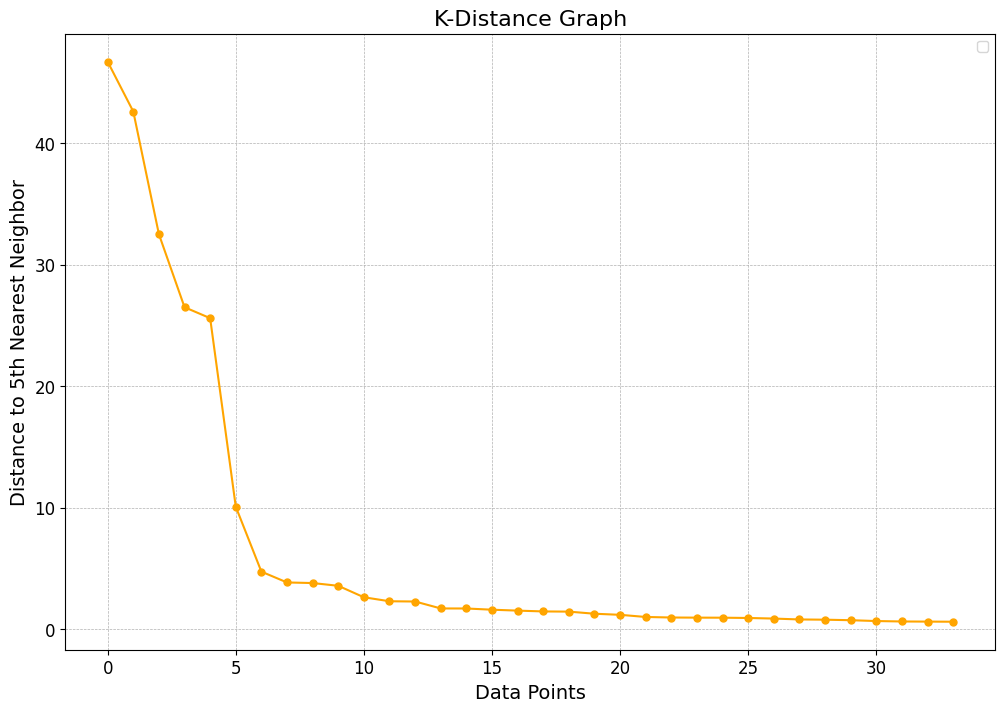

In [29]:
featuress = [
    'Residential_2021', 'Industrial_2021', 'Business_2021', 'Social_2021', 'Gov_Office_2021', 
    'Pub_Street_2021', 'Total_2021', 'Residential_2022', 'Industrial_2022', 'Business_2022', 
    'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'Residential', 
    'Industrial', 'Business', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 
    'JP_2021', 'JP_2022', 'JP_2023', 'KP_2021', 'KP_2022', 'KP_2023'
]

data_T = data[featuress]
scaler = RobustScaler()
scaled_features = scaler.fit_transform(data_T)

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

distances = sorted(distances[:,4], reverse=True)

plt.figure(figsize=(12, 8))
plt.plot(distances, color='orange', linestyle='-', marker='o', markersize=5)
plt.title("K-Distance Graph", fontsize=16)
plt.xlabel("Data Points", fontsize=14)
plt.ylabel("Distance to 5th Nearest Neighbor", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()

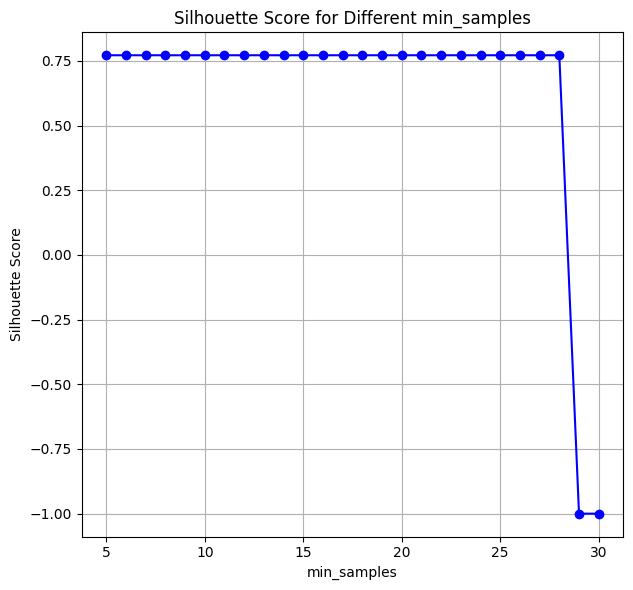

In [30]:
dataS = data[featuress] 
scaler = RobustScaler()
scaled_features = scaler.fit_transform(dataS)

def analyze_min_samples(X, eps=6, min_samples_range=range(5, 31)):
    silhouette_scores = []
    num_clusterslist = []
    num_outlierslist = []

    for min_samples in min_samples_range:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)

        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
        else:
            score = -1  

        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  
        num_outliers = list(labels).count(-1)
        
        silhouette_scores.append(score)
        num_clusterslist.append(num_clusters)
        num_outlierslist.append(num_outliers)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(min_samples_range, silhouette_scores, marker='o', color='b', label="Silhouette Score")
    plt.xlabel('min_samples')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Different min_samples')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

analyze_min_samples(scaled_features, eps=6)


In [52]:
dbscan = DBSCAN(eps=9, min_samples=16)
clusters = dbscan.fit_predict(scaled_features)

data['Cluster'] = clusters

for cluster_id in sorted(set(clusters)):
    provinsi = data[data['Cluster'] == cluster_id]['Province'].tolist()
    if cluster_id == -1:
        print("\nOutlier:")
    else:
        print(f"\nCluster {cluster_id}:")
    print(provinsi)

valid_mask = clusters != -1
if len(set(clusters[valid_mask])) > 1 and valid_mask.sum() > 1:
    sil_score_no_outliers = silhouette_score(
        scaled_features[valid_mask], clusters[valid_mask]
    )
    print(f"\nSilhouette Score (tanpa outliers): {sil_score_no_outliers:}")
else:
    print("\nSilhouette Score (tanpa outliers) tidak dapat dihitung.")

if len(set(clusters)) > 1:
    sil_score_with_outliers = silhouette_score(scaled_features, clusters)
    print(f"Silhouette Score (dengan outliers): {sil_score_with_outliers:}")
else:
    print("Silhouette Score (dengan outliers) tidak dapat dihitung.")



Outlier:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']

Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']

Silhouette Score (tanpa outliers) tidak dapat dihitung.
Silhouette Score (dengan outliers): 0.8098681704159247


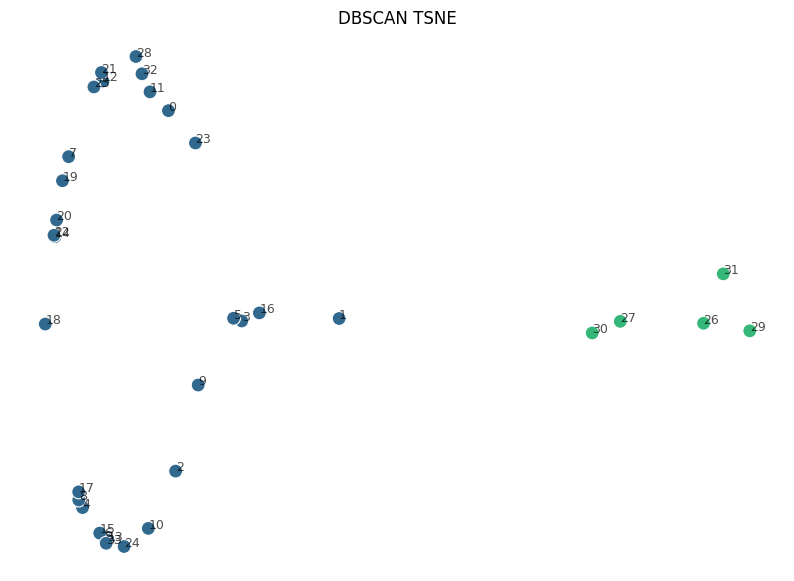


Index Provinsi dan Nama Provinsi:
Index 0: Aceh
Index 1: Sumatera Utara
Index 2: Sumatera Barat
Index 3: Riau
Index 4: Kep. Riau
Index 5: Sumatera Selatan
Index 6: Jambi
Index 7: Bengkulu
Index 8: Kep. Bangka Belitung
Index 9: Lampung
Index 10: Kalimantan Barat
Index 11: Kalimantan Selatan
Index 12: Kalimantan Tengah
Index 13: Sulawesi Utara
Index 14: Gorontalo
Index 15: Sulawesi Tengah
Index 16: Sulawesi Selatan
Index 17: Sulawesi Tenggara
Index 18: Sulawesi Barat
Index 19: Maluku
Index 20: Maluku Utara
Index 21: Papua
Index 22: Papua Barat
Index 23: Bali
Index 24: Nusa Tenggara Barat
Index 25: Nusa Tenggara Timur
Index 26: Jawa Timur
Index 27: Jawa Tengah
Index 28: DI Yogyakarta
Index 29: Jawa Barat
Index 30: Banten
Index 31: DKI Jakarta
Index 32: Kalimantan Timur
Index 33: Kalimantan Utara


In [34]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_features)

df_tsne = pd.DataFrame(data=X_tsne, columns=['tSNE1', 'tSNE2'])
df_tsne['Cluster'] = clusters_modif
df_tsne['Provinsi'] = data['Province'].tolist()

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='Cluster', palette='viridis', s=100, legend=None)

for i in range(len(df_tsne)):
    plt.text(df_tsne.loc[i, 'tSNE1'], df_tsne.loc[i, 'tSNE2'], str(i), fontsize=9, alpha=0.7)

plt.title('DBSCAN TSNE')
plt.axis('off')  
plt.show()

print("\nIndex Provinsi dan Nama Provinsi:")
for i, province in enumerate(df_tsne['Provinsi']):
    print(f"Index {i}: {province}")


In [40]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_umap_clusters(X, cluster_labels, provinsi_names, title='DBSCAN UMAP'):
    reducer = umap.UMAP(random_state=42)
    X_umap = reducer.fit_transform(X)

    df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
    df_umap['Cluster'] = cluster_labels
    df_umap['Provinsi'] = provinsi_names

    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', s=100, legend=None)
    for i in range(len(df_umap)):
        plt.text(df_umap.loc[i, 'UMAP1'], df_umap.loc[i, 'UMAP2'], str(i), fontsize=9, alpha=0.7)

    plt.title(title)
    plt.axis('off')  
    plt.show()



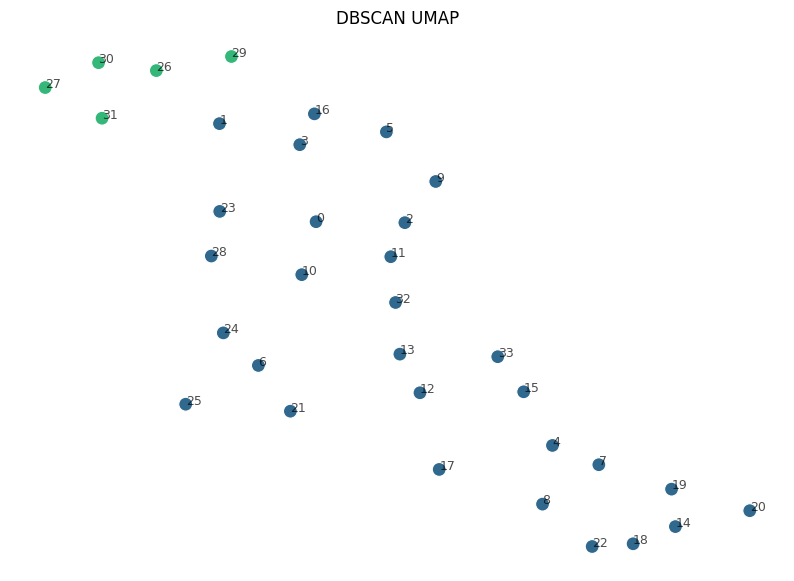

In [41]:
plot_umap_clusters(scaled_features, clusters_modif, data['Province'].tolist())

In [33]:
import leafmap as lf
import geopandas as gpd

geo_data = gpd.read_file('../DATASET/id.json')

geo_data['name'] = geo_data['name'].replace('Jakarta Raya', 'DKI Jakarta')
geo_data['name'] = geo_data['name'].replace('Kepulauan Riau', 'Kep. Riau')
geo_data['name'] = geo_data['name'].replace('Yogyakarta', 'DI Yogyakarta')
geo_data['name'] = geo_data['name'].replace('Bangka-Belitung', 'Kep. Bangka Belitung')
geo_data['name'] = geo_data['name'].replace('North Kalimantan', 'Kalimantan Utara')

merged_data = geo_data.merge(data, left_on='name', right_on='Province')

m = lf.Map(center=[-6.1751, 106.8650], zoom=5)

cluster_colors = {
    1: 'blue',  
    0: 'green', 
    -1: 'red'    
}

for cluster in merged_data['Cluster'].unique():
    cluster_data = merged_data[merged_data['Cluster'] == cluster]

    cluster_data['color'] = cluster_data['Cluster'].map(cluster_colors)

    m.add_gdf(cluster_data, layer_name=f"Cluster {cluster}", color_col="color")

m.add_layer_control()

m

Map(center=[-6.1751, 106.865], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…